# MUJADID CHOIRUS SURYA
# 12150015
# RA

# a.) Selesaikan semua langkah-langkah disetiap metode yang ada pada modul ini !

# Praktikum 1 : Metode PCA dan LDA

## PCA

In [376]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [377]:
import pandas as np
from sklearn.preprocessing import StandardScaler
TT_df = pd.read_csv('HarryPotterTT.csv')
TT_df


,Name,Magic,Cunning,Courage,Wisdom,Temper
0,'Harry Potter',62,21,42,26,7
1,'Hermione Granger',60,16,40,73,2
2,'Ron Weasley',45,14,40,22,4
3,'Prof. Dumbledore',105,24,39,82,0
4,'Prof. Snape',85,24,19,71,7
5,'Prof. McGonagail',95,19,29,76,5
6,'Prof. Moody',82,20,35,69,5
7,'Rubeus Hagrid',12,11,30,8,7
8,'Fred Weasley',87,13,30,22,4
9,'George Weasley',87,13,30,22,4


In [378]:
y = TT_df.pop('Name').values
X = TT_df.values
X_scal = StandardScaler().fit_transform(X)
X.shape


(22, 5)

In [379]:
pcaHP = PCA(n_components=4)
X_r = pcaHP.fit(X_scal).transform(X_scal)
pcaHP.explained_variance_ratio_



array([0.48877025, 0.31551511, 0.10842469, 0.0501518 ])

In [380]:
pcaHP.components_

array([[ 0.57407296,  0.40754714,  0.3846298 ,  0.57788956, -0.14983036],
       [ 0.10834723,  0.52231617, -0.44046049,  0.0043925 ,  0.72209553],
       [-0.27762934,  0.33155304,  0.76359223, -0.39624817,  0.27001634],
       [ 0.63573329, -0.55900795,  0.19114024, -0.25378831,  0.42709507]])

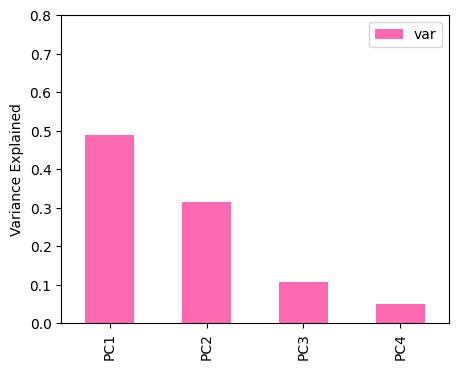

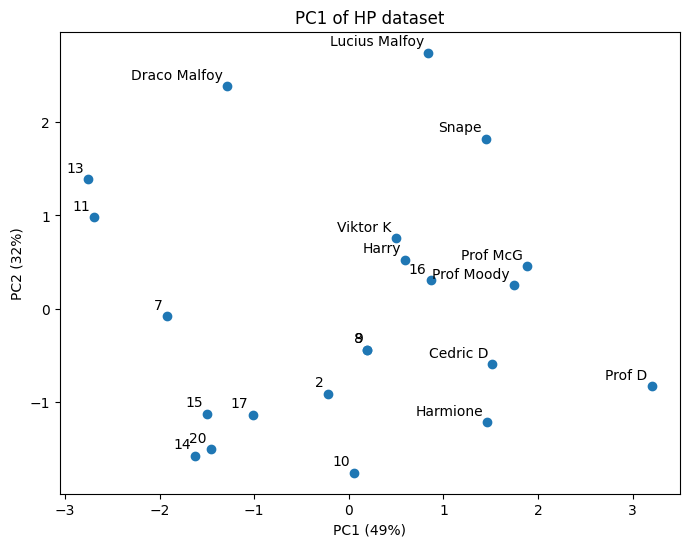

In [381]:
df = pd.DataFrame(pcaHP.explained_variance_ratio_,
                  index=['PC1', 'PC2', 'PC3', 'PC4'],columns =['var'])
pl = df.plot.bar(color='hotpink',figsize=(5,4))
pl.set_ylabel("Variance Explained")
pl.set_ylim([0,0.8])


plt.figure(figsize=(8,6))
lw = 2
labels = list(range(len (y)))
labels[0]='Harry'
labels[1]='Harmione'
labels[3]='Prof D'
labels[5]='Prof McG'
labels[6]='Prof Moody'
labels[18]='Cedric D'
labels[19]='Viktor K'
labels[21]='Lucius Malfoy'
labels[4]='Snape'
labels[12]='Draco Malfoy'
plt.scatter(X_r[:, 0], X_r[:, 1])
for label, xi, yi in zip(labels, X_r[:, 0], X_r[:, 1]):
    plt.annotate(
        label,
        xy=(xi, yi), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.xlabel('PC1 (49%)')
plt.ylabel('PC2 (32%)')
plt.title('PC1 of HP dataset')
plt.show()


## LDA

In [382]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [383]:
penguins_df = pd.read_csv('/content/penguins.csv', index_col = 0)
y = penguins_df.pop('species').values
X_raw = penguins_df.values
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=1, test_size=1/2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
feature_names = penguins_df.columns
print(penguins_df.shape)
penguins_df.head()


(333, 4)


,bill_length,bill_depth,flipper_length,body_mass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [384]:
types = list(Counter(y).keys())
types


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_tr_lda = lda.transform(X_train)
X_tr_lda.shape


(166, 2)

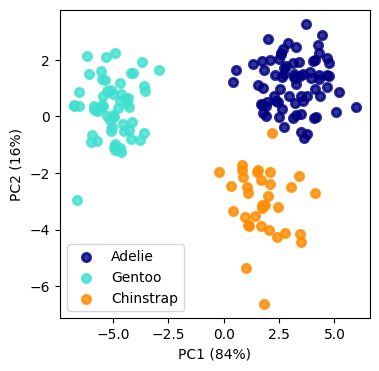

In [385]:
plt.figure(figsize=(4,4))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, target_name in zip(colors, types):
    plt.scatter(X_tr_lda[y_train == target_name, 0], X_tr_lda[y_train == target_name, 1],
                color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1 (84%)')
plt.ylabel('PC2 (16%)')

plt.show()

In [386]:
y_pred = lda.predict(X_test)
accuracy_score(y_pred,y_test)


0.9700598802395209

In [387]:
pca = PCA(n_components=4)
X_tr_pca = pca.fit(X_train).transform(X_train)
#Proportion of variance explained for each components
pca.explained_variance_ratio_


array([0.67991833, 0.20387145, 0.08721252, 0.0289977 ])

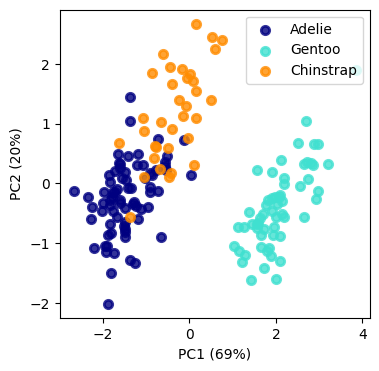

In [388]:
plt.figure(figsize=(4, 4))
lw = 2
for color, target_name in zip(colors, types):
    plt.scatter(X_tr_pca[y_train == target_name, 0], X_tr_pca[y_train == target_name, 1],
                color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1 (69%)')
plt.ylabel('PC2 (20%)')
#plt.tittle('PCA of the Penguins dataset')
plt.show()



# Praktikum 2 : Metode Filter

## Feature Selection using Filters

In [389]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [390]:
# Import dataset
seg_data = pd.read_csv('/content/segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [391]:
# Menghitung data pada variabel target
seg_data['Class'].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

In [392]:
# Split Data

y = seg_data.pop('Class').values
X_raw = seg_data.values

X_tr_raw, X_ts_raw, y_train, y_test =  train_test_split(X_raw, y,
                                                        random_state=1, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = seg_data.columns
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

In [393]:
# Feature Scores

chi2_score, pval = chi2(X_train, y_train)
chi2_score = np.nan_to_num(chi2_score)
chi2_score

array([ 14.99569813, 114.86161054,   0.        ,  13.47060858,
        27.33137409,  14.52455789,  20.00650221,  17.74732567,
        15.4768292 , 293.4360061 , 290.96380025, 303.47783064,
       290.11739498,  54.25395182, 111.01924229,  92.91780859,
       287.66891553,  81.64654774, 268.86221356])

In [394]:
i_scores = mutual_info_classif(X_train, y_train)
i_scores

array([0.13620735, 0.95212454, 0.        , 0.        , 0.0082756 ,
       0.49141987, 0.32323507, 0.46644319, 0.35724878, 1.15938272,
       1.2145828 , 1.11284407, 1.13986314, 0.76575689, 0.91154351,
       0.95173252, 1.13897675, 0.92845474, 1.13385044])

In [395]:
# Simpan Skor

df = pd.DataFrame({'Mutual Info.': i_scores, 'Chi Square':chi2_score, 'Feature':feature_names})
df.set_index('Feature', inplace = True)
df.sort_values('Mutual Info.', inplace = True, ascending = False)
df

,Mutual Info.,Chi Square
Feature,,
RAWRED-MEAN,1.214583,290.963800
INTENSITY-MEAN,1.159383,293.436006
RAWGREEN-MEAN,1.139863,290.117395
VALUE-MEAN,1.138977,287.668916
HUE-MEAN,1.133850,268.862214
RAWBLUE-MEAN,1.112844,303.477831
REGION-CENTROID-ROW,0.952125,114.861611
EXGREEN-MEAN,0.951733,92.917809
SATURATION-MEAN,0.928455,81.646548


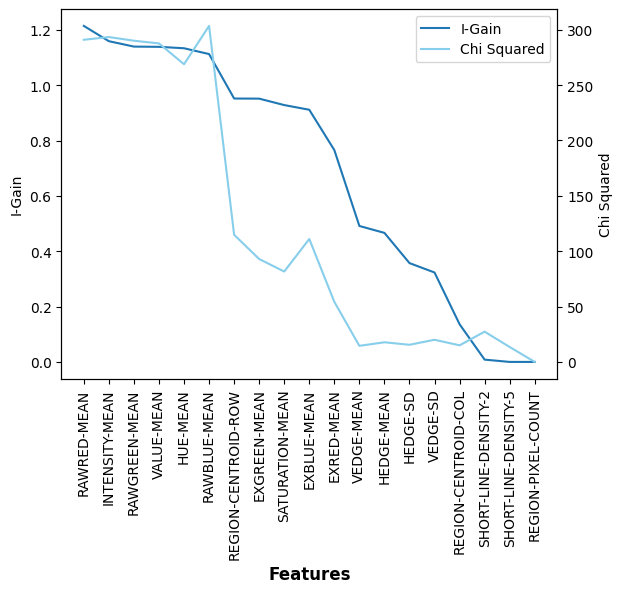

In [396]:
# Plotting the Filter score

fig, ax = plt.subplots()
rr = range(0,len(feature_names))
ax2 = ax.twinx()
ax.plot(df.index, df['Mutual Info.'],label='I-Gain')
ax2.plot(df.index, df['Chi Square'], color='skyblue', label='Chi Squared')
ax.set_xticks(rr)

ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Chi Squared')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform = ax.transAxes)

In [397]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SignificanceResult(statistic=0.9170689781482549, pvalue=3.3513257591746246e-08)

## Correlation Based Feature Selection (CFS)

In [398]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [399]:
#from CFS import cfs, merit_calculation
#from CFS_ForwardSearch import CFS_FS

# Praktikum 3 : Metode Embedded (D-Tree)

In [400]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


In [401]:
penguins_df = pd.read_csv('penguins.csv', index_col = 0)
feature_names = penguins_df.columns
print(penguins_df.shape)
penguins_df.head()
penguins_df['species'].value_counts()

(333, 5)


Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [402]:
y = penguins_df.pop('species').values
X = penguins_df.values


In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
feature_names = penguins_df.columns
X_train.shape, X_test.shape

((266, 4), (67, 4))

In [404]:
ftree = DecisionTreeClassifier(criterion='entropy')
ftree = ftree.fit(X_train, y_train)
y_pred = ftree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuract %4.2f"%(acc))

Test set accuract 0.91


[Text(0.5769230769230769, 0.9285714285714286, 'flipper_length <= 207.5\n266\n[118, 55, 93]\nAdelie'),
 Text(0.38461538461538464, 0.7857142857142857, 'bill_length <= 43.05\n169\n[117, 51, 1]\nAdelie'),
 Text(0.23076923076923078, 0.6428571428571429, 'bill_depth <= 16.65\n114\n[113, 1, 0]\nAdelie'),
 Text(0.15384615384615385, 0.5, 'bill_length <= 39.5\n9\n[8, 1, 0]\nAdelie'),
 Text(0.07692307692307693, 0.35714285714285715, '8\n[8, 0, 0]\nAdelie'),
 Text(0.23076923076923078, 0.35714285714285715, '1\n[0, 1, 0]\nGentoo'),
 Text(0.3076923076923077, 0.5, '105\n[105, 0, 0]\nAdelie'),
 Text(0.5384615384615384, 0.6428571428571429, 'body_mass <= 4125.0\n55\n[4, 50, 1]\nGentoo'),
 Text(0.46153846153846156, 0.5, '44\n[0, 44, 0]\nGentoo'),
 Text(0.6153846153846154, 0.5, 'bill_length <= 47.2\n11\n[4, 6, 1]\nGentoo'),
 Text(0.46153846153846156, 0.35714285714285715, 'body_mass <= 4175.0\n5\n[4, 1, 0]\nAdelie'),
 Text(0.38461538461538464, 0.21428571428571427, 'flipper_length <= 196.0\n2\n[1, 1, 0]\nAdeli

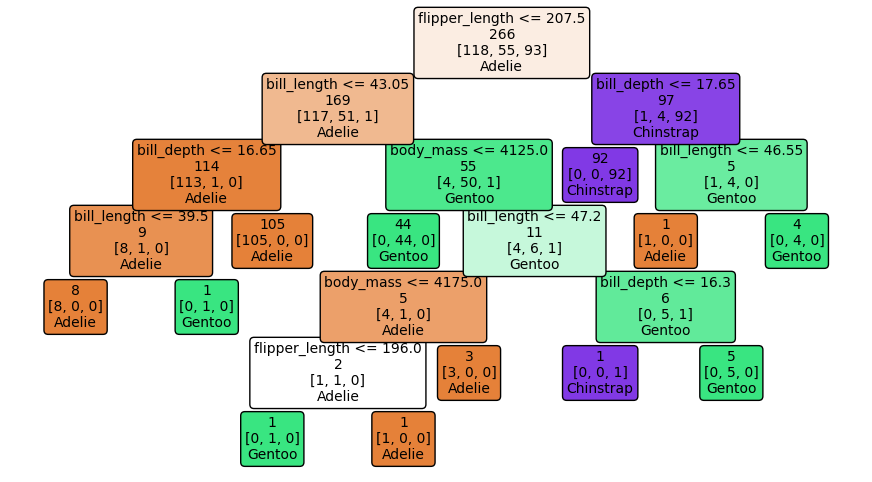

In [405]:
plt.figure(figsize=(11, 6))


tree.plot_tree(ftree, fontsize = 10, feature_names = feature_names,
                      class_names=['Adelie', 'Gentoo', 'Chinstrap'],
                      label = 'none', filled = True, impurity = False,
               rounded=True)

In [406]:
fi = ftree.feature_importances_
for fi_val, f_name in zip(fi, feature_names):
  print(" %4.2f %s" % (fi_val, f_name))

 0.34 bill_length
 0.09 bill_depth
 0.54 flipper_length
 0.04 body_mass


In [407]:
ftree.get_n_leaves()

12

In [408]:
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3)
p_tree = p_tree.fit(X_train, y_train)
y_pred = p_tree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Test set accuracy %4.2f' % (acc))

Test set accuracy 0.88


[Text(0.6, 0.8333333333333334, 'flipper_length <= 207.5\n266\n[118, 55, 93]\nAdelie'),
 Text(0.4, 0.5, 'bill_length <= 43.05\n169\n[117, 51, 1]\nAdelie'),
 Text(0.2, 0.16666666666666666, '114\n[113, 1, 0]\nAdelie'),
 Text(0.6, 0.16666666666666666, '55\n[4, 50, 1]\nGentoo'),
 Text(0.8, 0.5, '97\n[1, 4, 92]\nChinstrap')]

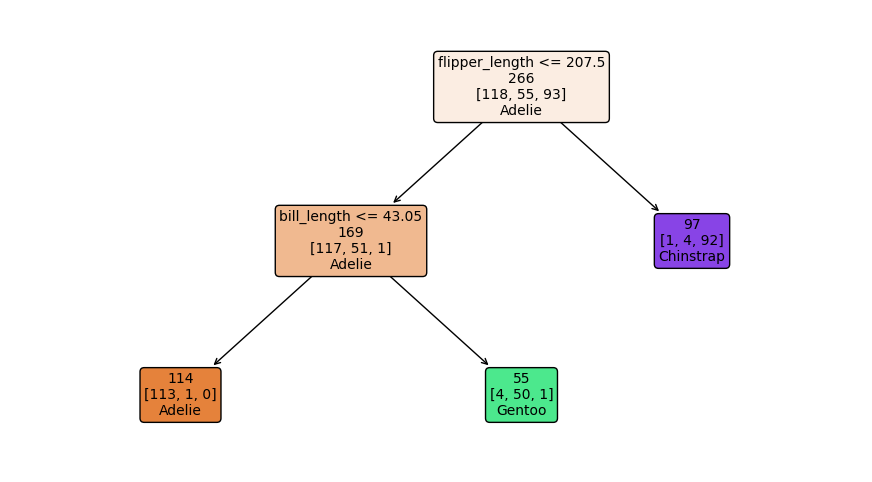

In [409]:
plt.figure(figsize=(11,6))

tree.plot_tree(p_tree, fontsize=10, feature_names = feature_names,
               class_names=['Adelie','Gentoo','Chinstrap'],
               label = 'none', filled=True, impurity = False,
               rounded=True)

In [410]:
fi = p_tree.feature_importances_
for fi_val, f_name in zip(fi, feature_names):
  print(' %4.3f  %s'%(fi_val, f_name))

 0.361  bill_length
 0.000  bill_depth
 0.639  flipper_length
 0.000  body_mass


#Praktikum 4 : Permutation Feature Importance and Wrapper

## 1) Permutation Feature Importance

In [411]:
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [412]:
col_heads = [str(x) for x in range(34)]
col_heads.append('Class')
ion_data = pd.read_csv('ionosphere.csv', names = col_heads, na_values='?', header = None)
ion_data.dropna(axis = 0, inplace = True)
print(ion_data.shape)
ion_data.head()

(351, 35)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [413]:
y = ion_data.pop('Class').values
X = ion_data
ion_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = ion_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    random_state=2, test_size=1/2)

In [414]:
res_df = pd.DataFrame([['All Features',0.0,0.0],
                       ['After PI',0.0,0.0],
                       ['After Wrapper',0.0,0.0]],columns=['Method','X-val','Hold-out'])
res_df.set_index('Method', inplace = True)

In [415]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)




res_df.loc['All Features']['X-val']=cv_acc.mean()
res_df.loc['All Features']['Hold-Out']=acc


print("X_val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_val on training all features: 0.818
Hold Out testing all features: 0.795


In [416]:
knn_perm = permutation_importance(kNN, X_train, y_train,
                                  n_repeats=10, random_state = 0)

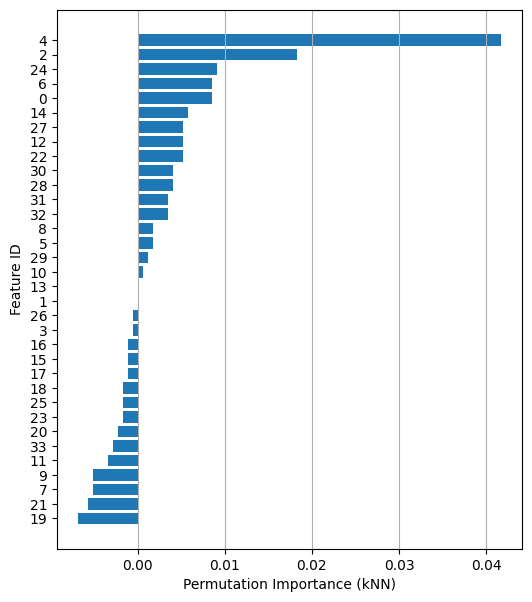

In [417]:
sorted_idx = knn_perm.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(6,7))
ax.barh(ion_data.columns[sorted_idx], knn_perm.importances_mean[sorted_idx], zorder=1)
ax.xaxis.grid(True)
ax.set_ylabel("Feature ID")
ax.set_xlabel("Permutation Importance (kNN)");
ax.figure.savefig("PIscores.png")

In [418]:
mask = knn_perm.importances_mean[sorted_idx]>0

In [419]:
PI_features = ion_data.columns[sorted_idx][mask]

In [420]:
X_PI = X[PI_features]
print("Permutation Importance seelects", X_PI.shape[1], "features.")
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI)
X_PI_train, X_PI_test, y_PI_train,y_PI_test = train_test_split(X_PI_scaled,
                                                               y, random_state=2,
                                                               test_size=1/2)


Permutation Importance seelects 18 features.


In [421]:
knnPI = KNeighborsClassifier(n_neighbors=3)
knnPI = knnPI.fit(X_PI_train, y_PI_train)


y_pred_PI = knnPI.predict(X_PI_test)
acc_PI = accuracy_score(y_pred_PI,y_test)
cv_acc_PI = cross_val_score(knnPI, X_PI_train, y_train, cv=8)


res_df.loc['After PI']['X-Val']=cv_acc_PI.mean()
res_df.loc['After PI']['Hold-out']=acc_PI


print("X_val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_val on training all features: 0.818
Hold Out testing all features: 0.795


## Wrapper

In [422]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select='auto', direction = 'backward',
                                 cv = 10, tol = 0.00001
                                )
sfs.fit(X_PI_train, y_train)
X_PI_W_train = sfs.transform(X_PI_train)
X_PI_W_test = sfs.transform(X_PI_test)



In [423]:
knnPIW = KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW.fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)
knnPIW.score (X_PI_W_test,y_PI_test)

(175, 16)


0.8465909090909091

In [424]:
knnPIW = KNeighborsClassifier(n_neighbors=3)
knnPIW= knnPIW.fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)
y_pred_PIW= knnPIW.predict(X_PI_W_test)
acc_PIW = accuracy_score (y_pred_PIW,y_PI_test)
cv_acc_PIW= cross_val_score(knnPIW, X_PI_W_train, y_train, cv=8)
res_df.loc['After Wrapper']['X-Val']=cv_acc_PIW.mean()
res_df.loc['After Wrapper']['Hold-Out']=acc_PIW
print("X Val on training all features: (0:3)", format (cv_acc_PIW.mean()))
print("Hold Out testing all features: (0:.3f)".format(acc_PIW))

(175, 16)
X Val on training all features: (0:3) 0.8971861471861472
Hold Out testing all features: (0:.3f)


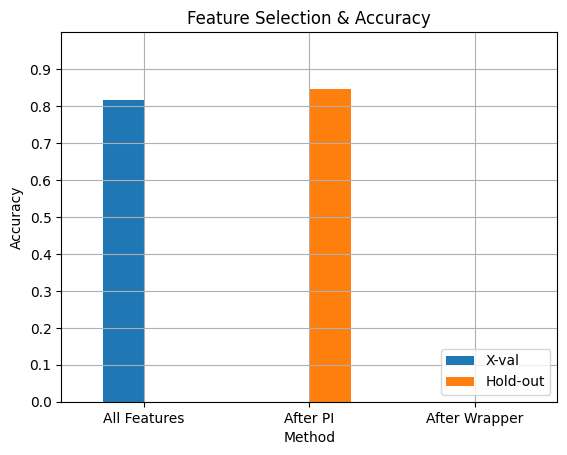

In [425]:
ax=res_df.plot.bar(rot=0)
ax.set_ylabel("Accuracy")
ax.set_title("Feature Selection & Accuracy")
ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1,0.1))
ax.legend(loc= 'lower right')
ax.grid(True)
ax.figure.savefig("PI+Wrapper.png")

# b.) Rangkum hasil dan analisis yang ada pada praktikum 1 dan jelaskan perbedaan kedua metode tersebut yaitu PCA dan LDA!

JAWABAN ADA DI PDF

# c.) Dengan dataset penguins.csv gunakan model Filters dan Correlation BasedFeature Selection (CFS). Kemudian rangkum hasil dan lakukan analisis!.

## Filters

In [426]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [427]:
# Import dataset
pen_data = pd.read_csv('/content/penguins.csv')
print(pen_data.shape)
pen_data.head()

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [428]:
# Menghitung data pada variabel target
pen_data['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [429]:
y = pen_data.pop('species').values
X_raw = pen_data.values

X_tr_raw, X_ts_raw, y_train, y_test =  train_test_split(X_raw, y,
                                                        random_state=1, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = pen_data.columns
X_train.shape, X_test.shape

((166, 5), (167, 5))

In [430]:
# Feature Scores

chi2_score, pval = chi2(X_train, y_train)
chi2_score = np.nan_to_num(chi2_score)
chi2_score

array([23.27831336, 12.33320189, 13.04056372, 15.91528968, 13.39467176])

In [431]:
i_scores = mutual_info_classif(X_train, y_train)
i_scores

array([1.03689788, 0.62636453, 0.52460371, 0.63509659, 0.5479292 ])

In [432]:
# Simpan Skor

df = pd.DataFrame({'Mutual Info.': i_scores, 'Chi Square':chi2_score, 'Feature':feature_names})
df.set_index('Feature', inplace = True)
df.sort_values('Mutual Info.', inplace = True, ascending = False)
df

,Mutual Info.,Chi Square
Feature,,
Unnamed: 0,1.036898,23.278313
flipper_length,0.635097,15.915290
bill_length,0.626365,12.333202
body_mass,0.547929,13.394672
bill_depth,0.524604,13.040564


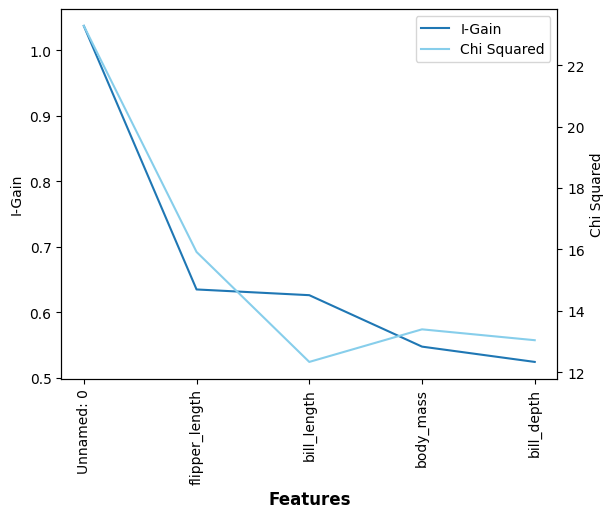

In [433]:
# Plotting the Filter score

fig, ax = plt.subplots()
rr = range(0,len(feature_names))
ax2 = ax.twinx()
ax.plot(df.index, df['Mutual Info.'],label='I-Gain')
ax2.plot(df.index, df['Chi Square'], color='skyblue', label='Chi Squared')
ax.set_xticks(rr)

ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Chi Squared')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform = ax.transAxes)

In [434]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SignificanceResult(statistic=0.7, pvalue=0.1881204043741873)

## Correlation Based Feature Selection (CFS)

In [435]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [436]:
from CFS import cfs, merit_calculation
from CFS_ForwardSearch import CFS_FS

In [437]:
pen_data = pd.read_csv('/content/penguins.csv')
print(pen_data.shape)
pen_data.head()

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [438]:
y = pen_data.pop('species').values
X_raw = pen_data.values
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
max_length = X_train.shape[0]
feat_num = X_train.shape[1]
X_train.shape, X_test.shape

((166, 5), (167, 5))

In [439]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_Val on training all features: 1.000
Hold Out testing all features: 1.000


### Forward Search - CFS

In [440]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train)
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0]))
print("Selected Feature index: " + str(sel_comb))

Merit Score of Selected Features: [0.34053677 0.34140439]
Selected Feature index: (0, 3)


In [441]:
# Print the selected features
feature_names_sel = pen_data.columns[np.array(sel_comb)]
feature_names_sel

Index(['Unnamed: 0', 'flipper_length'], dtype='object')

#### Evaluate on Test Data Forward Search - CFS

In [442]:
X_train_CFS_FS = X_train[:,sel_comb]
X_test_CFS_FS = X_test[:,sel_comb]

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train)

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS)

acc_CFS_FS = accuracy_score(y_pred,y_test)
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS))

X_Val on training selected features: 0.988
Hold Out testing selected features: 1.000


### Best First Search - CFS

In [443]:
Sel_feat = cfs(X_train,y_train)
Sel_feat = Sel_feat[Sel_feat!=-1]
Sel_feat

array([0, 3, 1, 2, 4])

In [444]:
# Print the names of the features selected
feature_names_sel = seg_data.columns[Sel_feat]
feature_names_sel

Index(['REGION-CENTROID-COL', 'SHORT-LINE-DENSITY-5', 'REGION-CENTROID-ROW',
       'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-2'],
      dtype='object')

In [445]:
# Find the merit score for the search space of the selected feature subsets
merit = []
cv_acc_CFS = []
for i in range(1,len(Sel_feat)+1):
    X_train_CFS = X_train[:,Sel_feat[0:i]]
    merit.insert(i, merit_calculation(X_train_CFS, y_train))
    kNN_CFS = kNN.fit(X_train_CFS,y_train)
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean())

merit

[0.3405367650586217,
 0.34140438602544737,
 0.34135154379629856,
 0.3315979801428004,
 0.3247704646387883]

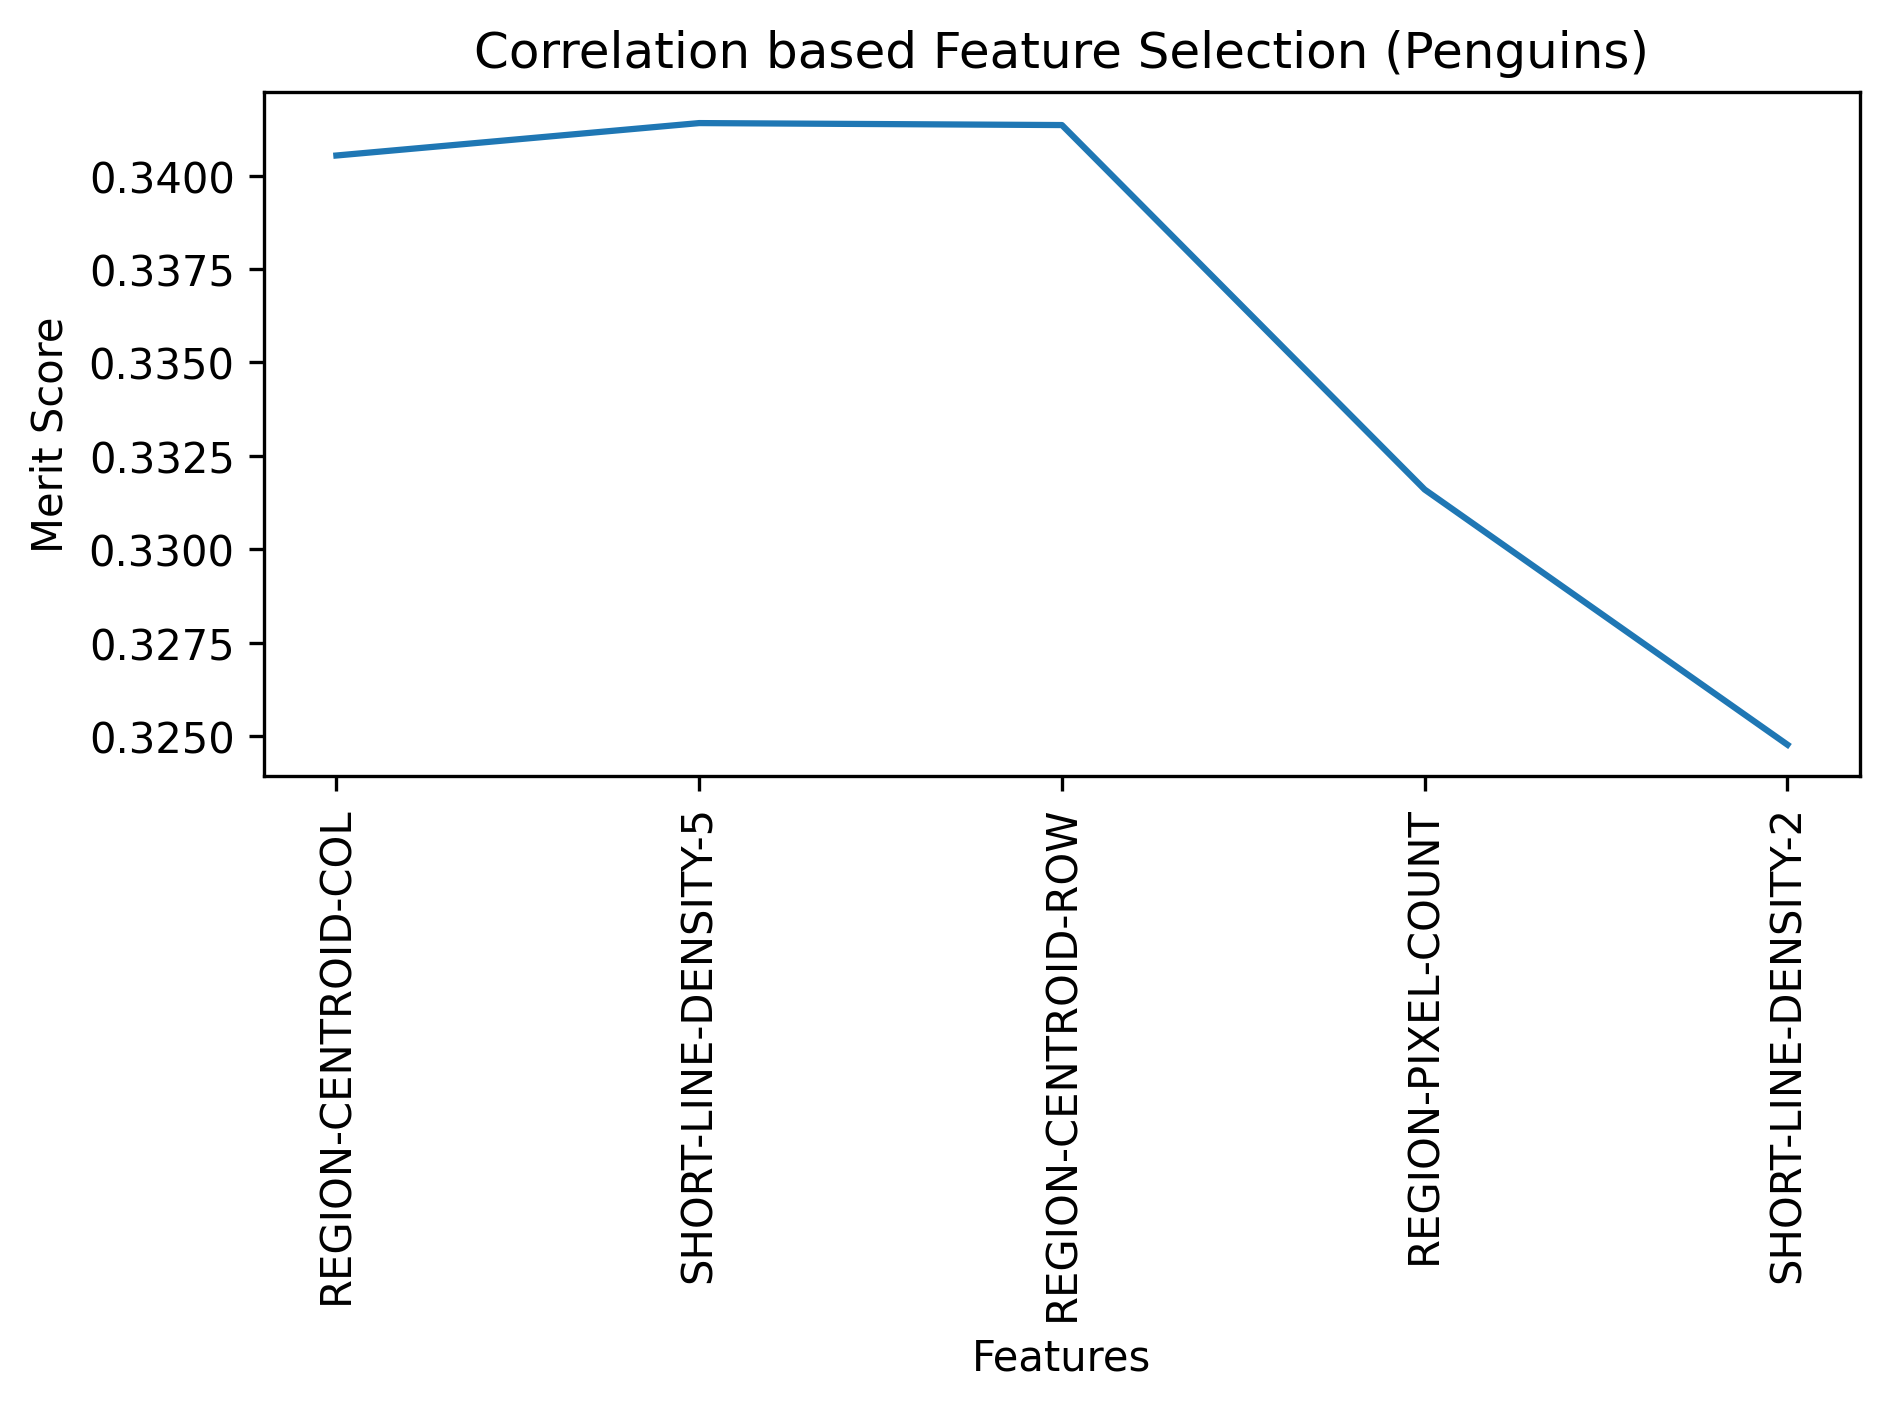

In [446]:
# Plot merit score as features are added
f1 = plt.figure(dpi = 300)
plt.plot(feature_names_sel, merit)
plt.title("Correlation based Feature Selection (Penguins)")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Merit Score")
plt.tight_layout()

#### Evaluate on test data Best First Search - CFS

In [447]:
X_test_CFS = X_test[:,Sel_feat]

kNN_CFS = kNN.fit(X_train_CFS,y_train)

y_pred = kNN_CFS.predict(X_test_CFS)

acc_CFS = accuracy_score(y_pred,y_test)
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS))

X_Val on training selected features: 1.000
Hold Out testing selected features: 1.000


#### Plot Results

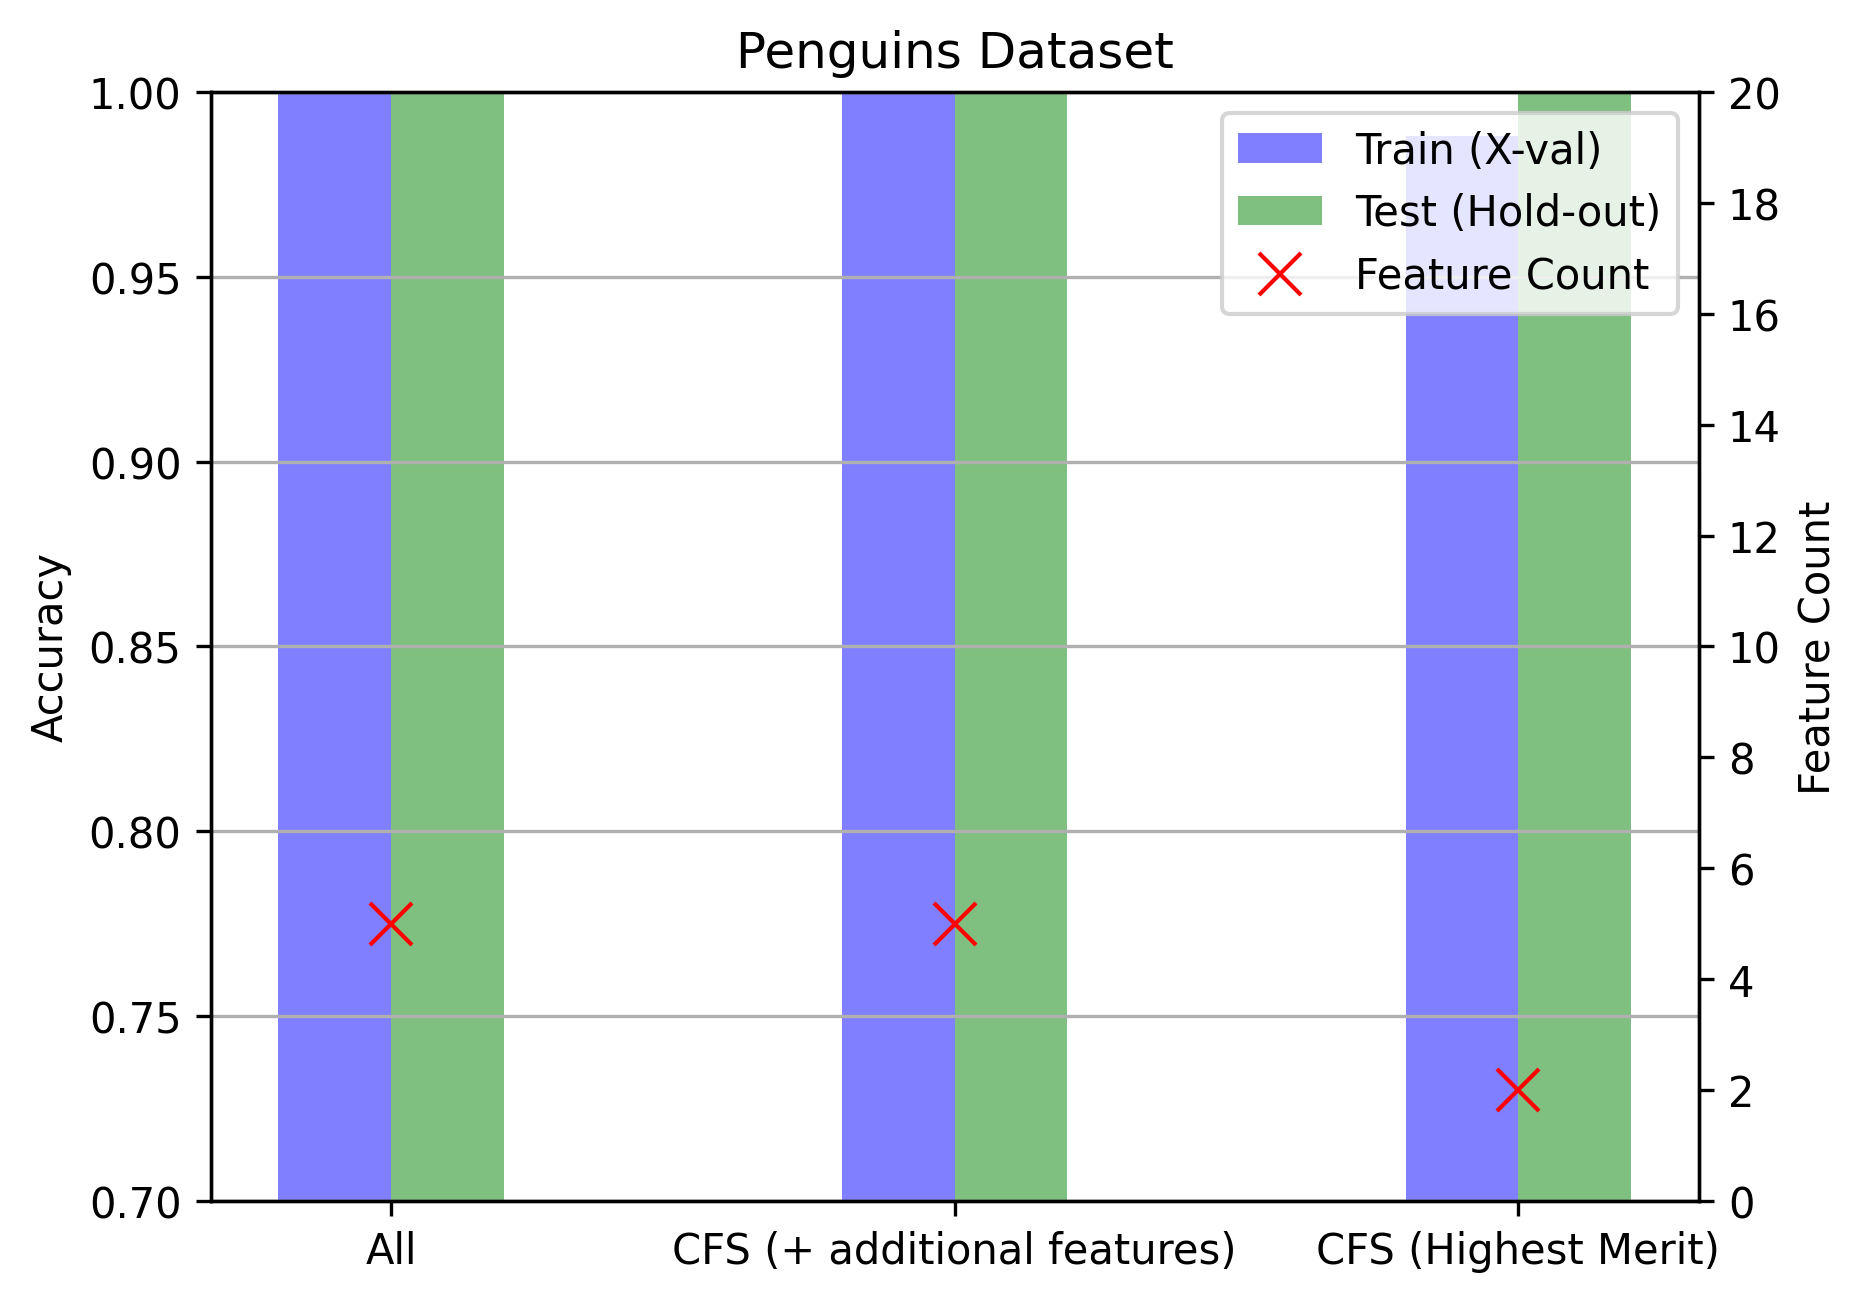

In [448]:
fig, ax = plt.subplots(dpi = 300)
width = 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)']
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]]
accs = [acc,acc_CFS, acc_CFS_FS]
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc = 'upper right')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
plt.title("Penguins Dataset")
plt.show()

# d.) Dengan dataset Segmentasi gunakan model decison tree. Kemudian rangkum hasil dan lakukan analisis!.

In [449]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [450]:
seg_df = pd.read_csv('segmentation-all.csv')

feature_names = seg_df.columns
print(seg_df.shape)
seg_df.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [451]:
seg_df['Class'].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

In [452]:
y = seg_df.pop('Class').values
X = seg_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       random_state=1, test_size=1/2)

feature_names = seg_df.columns
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

In [453]:
ftree = DecisionTreeClassifier(criterion='entropy')
ftree = ftree.fit(X_train, y_train)
y_pred = ftree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test Set accurant %4.2f" % (acc))

Test Set accurant 0.96


[Text(0.7732405462184874, 0.9583333333333334, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.6137079831932774, 0.875, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.3954831932773109, 0.7916666666666666, 'HUE-MEAN <= -1.838\n485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.13550420168067226, 0.7083333333333334, 'HUE-MEAN <= -2.224\n308\n[3, 20, 144, 0, 0, 0, 141]\nFOLIAGE'),
 Text(0.05042016806722689, 0.625, 'SATURATION-MEAN <= 0.478\n82\n[0, 1, 79, 0, 0, 0, 2]\nFOLIAGE'),
 Text(0.03361344537815126, 0.5416666666666666, 'VEDGE-SD <= 7.31\n3\n[0, 1, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.01680672268907563, 0.4583333333333333, '2\n[0, 0, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.05042016806722689, 0.4583333333333333, '1\n[0, 1, 0, 0, 0, 0, 0]\nSKY'),
 Text(0.06722689075630252, 0.5416666666666666, '79\n[0, 0, 79, 0, 0, 0, 0]\nFOLIAGE'),
 Text(0.22058823529411764, 0.625, 'RAWRED-MEAN <= 2.611\n226\n[3, 19, 65, 0, 0, 0, 139]\nGRA

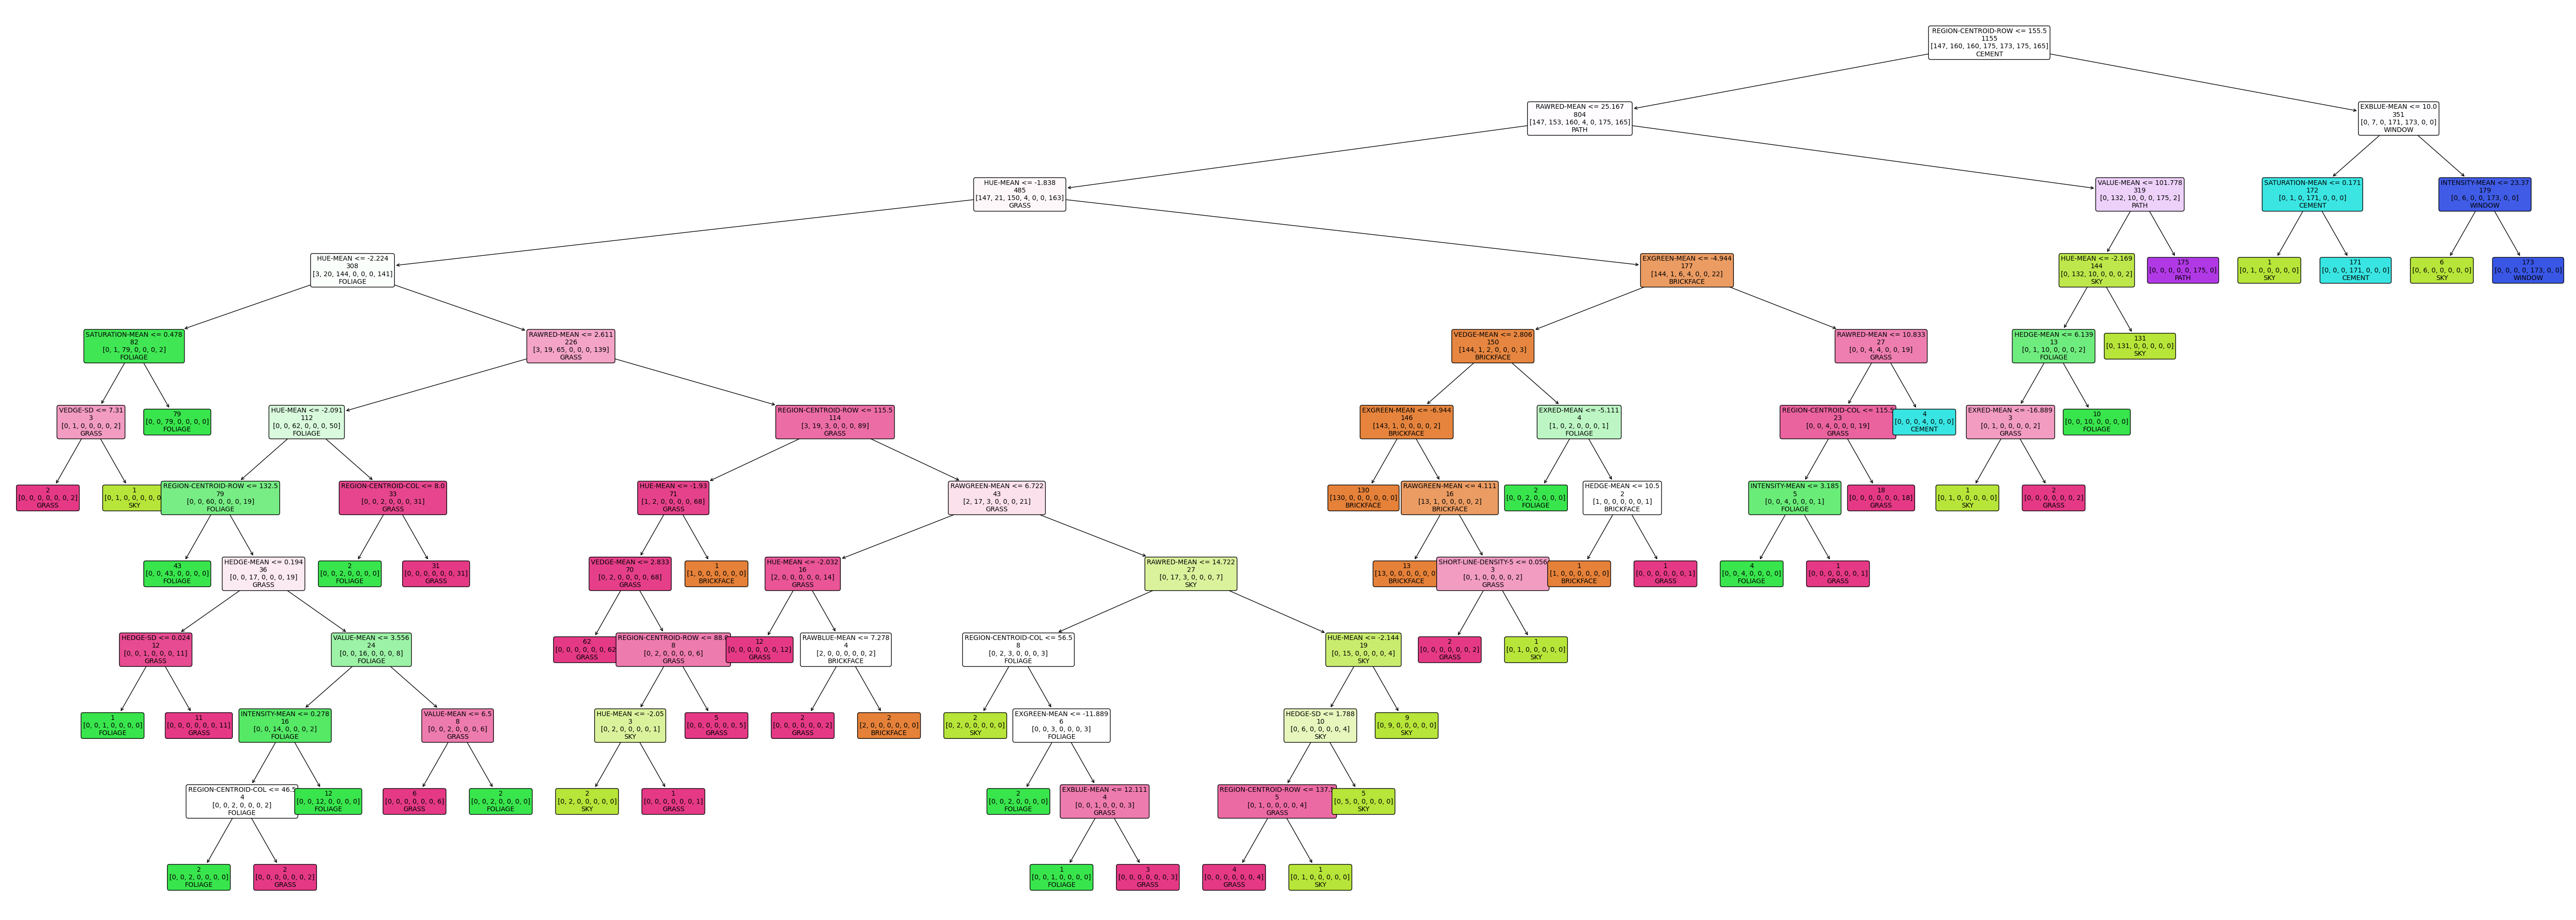

In [454]:
plt.figure(figsize=(70, 25))

tree.plot_tree(ftree, fontsize = 10, feature_names = feature_names,
               class_names=['BRICKFACE', 'SKY', 'FOLIAGE','CEMENT', 'WINDOW', 'PATH', 'GRASS'],
               label = 'none', filled=True, impurity = False,
               rounded=True)

In [455]:
fi = ftree.feature_importances_

for fi_val, f_name in zip(fi, feature_names):
    print(" %4.2f %s" % (fi_val, f_name))

 0.01 REGION-CENTROID-COL
 0.31 REGION-CENTROID-ROW
 0.00 REGION-PIXEL-COUNT
 0.00 SHORT-LINE-DENSITY-5
 0.00 SHORT-LINE-DENSITY-2
 0.01 VEDGE-MEAN
 0.00 VEDGE-SD
 0.01 HEDGE-MEAN
 0.00 HEDGE-SD
 0.01 INTENSITY-MEAN
 0.22 RAWRED-MEAN
 0.00 RAWBLUE-MEAN
 0.01 RAWGREEN-MEAN
 0.00 EXRED-MEAN
 0.11 EXBLUE-MEAN
 0.03 EXGREEN-MEAN
 0.10 VALUE-MEAN
 0.01 SATURATION-MEAN
 0.16 HUE-MEAN


In [456]:
ftree.get_n_leaves()

49

In [457]:
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 3)
p_tree = p_tree.fit(X_train, y_train)
y_pred = p_tree.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuract %4.2f" % (acc))

Test set accuract 0.41


[Text(0.6, 0.8333333333333334, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.4, 0.5, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.2, 0.16666666666666666, '485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.6, 0.16666666666666666, '319\n[0, 132, 10, 0, 0, 175, 2]\nPATH'),
 Text(0.8, 0.5, '351\n[0, 7, 0, 171, 173, 0, 0]\nWINDOW')]

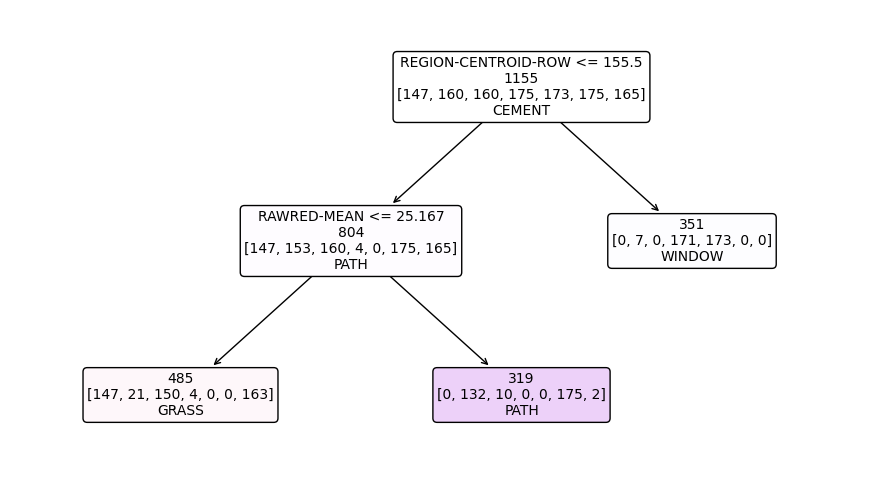

In [458]:
plt.figure(figsize=(11, 6))

tree.plot_tree(p_tree, fontsize = 10, feature_names = feature_names,
               class_names=['BRICKFACE', 'SKY', 'FOLIAGE','CEMENT', 'WINDOW', 'PATH', 'GRASS'],
               label = 'none', filled=True, impurity = False,
               rounded=True)

In [459]:
fi = p_tree.feature_importances_

for fi_val, f_name in zip(fi, feature_names):
    print(" %4.2f %s" % (fi_val, f_name))

 0.00 REGION-CENTROID-COL
 0.61 REGION-CENTROID-ROW
 0.00 REGION-PIXEL-COUNT
 0.00 SHORT-LINE-DENSITY-5
 0.00 SHORT-LINE-DENSITY-2
 0.00 VEDGE-MEAN
 0.00 VEDGE-SD
 0.00 HEDGE-MEAN
 0.00 HEDGE-SD
 0.00 INTENSITY-MEAN
 0.39 RAWRED-MEAN
 0.00 RAWBLUE-MEAN
 0.00 RAWGREEN-MEAN
 0.00 EXRED-MEAN
 0.00 EXBLUE-MEAN
 0.00 EXGREEN-MEAN
 0.00 VALUE-MEAN
 0.00 SATURATION-MEAN
 0.00 HUE-MEAN


# e.) Carilah dataset selain dataset yang digunakan dalam praktikum ini kemudian gunakan metode Permutation Feature Importance dan Wrapper. Rangkum hasil, analisis, dan berikan kesimpulan !.

## Permutation Feature Importance

In [460]:
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [461]:
gen_data = pd.read_csv('/content/gender_classification_v7.csv')
gen_data.dropna(axis = 0, inplace = True)
print(gen_data.shape)
gen_data.head()

(5001, 8)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [462]:
y = gen_data.pop('gender').values
X = gen_data
gen_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = gen_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    random_state=2, test_size=1/2)

In [463]:
res_df = pd.DataFrame([['All Features',0.0,0.0],
                       ['After PI',0.0,0.0],
                       ['After Wrapper',0.0,0.0]],columns=['Method','X-val','Hold-out'])
res_df.set_index('Method', inplace = True)

In [464]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)




res_df.loc['All Features']['X-val']=cv_acc.mean()
res_df.loc['All Features']['Hold-Out']=acc


print("X_val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_val on training all features: 0.960
Hold Out testing all features: 0.968


In [465]:
knn_perm = permutation_importance(kNN, X_train, y_train,
                                  n_repeats=10, random_state = 0)

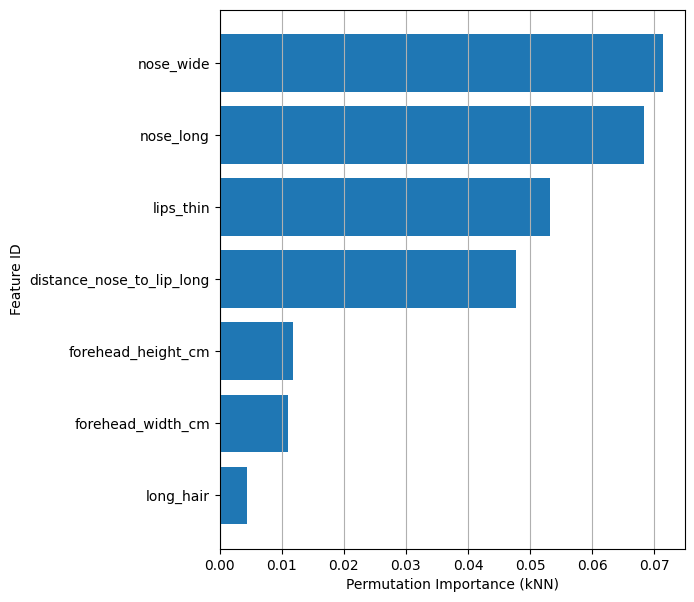

In [466]:
sorted_idx = knn_perm.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(6,7))
ax.barh(gen_data.columns[sorted_idx], knn_perm.importances_mean[sorted_idx], zorder=1)
ax.xaxis.grid(True)
ax.set_ylabel("Feature ID")
ax.set_xlabel("Permutation Importance (kNN)");
ax.figure.savefig("PIscores.png")

In [467]:
mask = knn_perm.importances_mean[sorted_idx]>0

In [468]:
PI_features = gen_data.columns[sorted_idx][mask]

In [469]:
X_PI = X[PI_features]
print("Permutation Importance seelects", X_PI.shape[1], "features.")
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI)
X_PI_train, X_PI_test, y_PI_train,y_PI_test = train_test_split(X_PI_scaled,
                                                               y, random_state=2,
                                                               test_size=1/2)


Permutation Importance seelects 7 features.


In [470]:
knnPI = KNeighborsClassifier(n_neighbors=3)
knnPI = knnPI.fit(X_PI_train, y_PI_train)


y_pred_PI = knnPI.predict(X_PI_test)
acc_PI = accuracy_score(y_pred_PI,y_test)
cv_acc_PI = cross_val_score(knnPI, X_PI_train, y_train, cv=8)


res_df.loc['After PI']['X-Val']=cv_acc_PI.mean()
res_df.loc['After PI']['Hold-out']=acc_PI


print("X_val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_val on training all features: 0.960
Hold Out testing all features: 0.968


## Wrapper

In [471]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select='auto', direction = 'backward',
                                 cv = 10, tol = 0.00001
                                )
sfs.fit(X_PI_train, y_train)
X_PI_W_train = sfs.transform(X_PI_train)
X_PI_W_test = sfs.transform(X_PI_test)

In [472]:
knnPIW = KNeighborsClassifier(n_neighbors=3)
knnPIW = knnPIW.fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)
knnPIW.score (X_PI_W_test,y_PI_test)

(2500, 6)


0.9660135945621752

In [475]:
knnPIW = KNeighborsClassifier(n_neighbors=3)
knnPIW= knnPIW.fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)
y_pred_PIW= knnPIW.predict(X_PI_W_test)
acc_PIW = accuracy_score (y_pred_PIW,y_PI_test)
cv_acc_PIW= cross_val_score(knnPIW, X_PI_W_train, y_train, cv=8)
res_df.loc['After Wrapper']['X-Val']=cv_acc_PIW.mean()
res_df.loc['After Wrapper']['Hold-Out']=acc_PIW
print("X Val on training all features: {0:.3f}".format(cv_acc_PIW.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc_PIW))

(2500, 6)
X Val on training all features: 0.958
Hold Out testing all features: 0.966


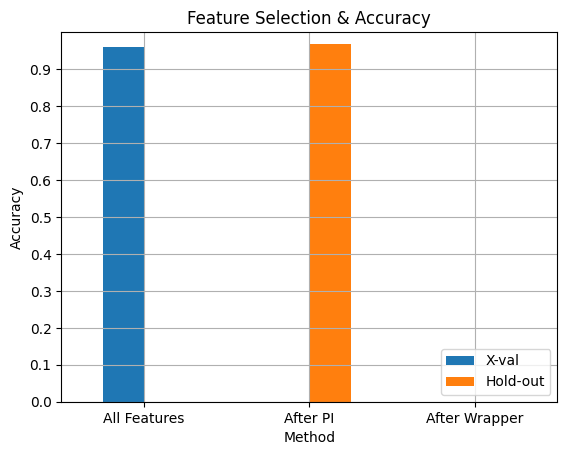

In [474]:
ax=res_df.plot.bar(rot=0)
ax.set_ylabel("Accuracy")
ax.set_title("Feature Selection & Accuracy")
ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1,0.1))
ax.legend(loc= 'lower right')
ax.grid(True)
ax.figure.savefig("PI+Wrapper.png")